# Movie Project

In [32]:
#Importing libaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

pd.options.mode.chained_assignment = None


# 1. Correct style name
plt.style.use("default")   

# 3. Correct rcParams usage
plt.rcParams["figure.figsize"] = (10, 6)   #  requires a tuple
plt.rcParams["font.size"] = 12             # remove the dot
plt.rcParams["axes.grid"] = True           #  key is "axes.grid", not "axes.grid.figsize"
plt.rcParams["grid.alpha"] = 0.3           # remove space in "grid .alpha"



#Readingg the Data
df=pd.read_csv(r'D:\Dina Projects\Data Analysis Projects\Data sets\movies.csv')


### Exploraing and Cleaning Data

In [33]:
# Exloraing Data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [34]:
# Showing number of rows and columns
df.shape


(7668, 15)

In [35]:
# Describing data statistically
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [36]:
# Removing Dublicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [37]:
# showing if there are Null values in our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [38]:
# Showing missing values in our data
for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [39]:
# Handling Missing for categorical columns

# Filling missing with mode value >> the most frequuent value for rating column
mode_value = df['rating'].mode()[0]
df['rating'] = df['rating'].fillna(mode_value)

# Filling missing with unknown value for company column
df['company'] = df['company'].fillna('Unknown')


In [40]:
# Handling missing values for the numeric column and filling it with median

df['gross'] = df['gross'].fillna(df['gross'].median())
df['budget'] = df['budget'].fillna(df['budget'].median())
df['score'] = df['score'].fillna(df['score'].median())
df['votes'] = df['votes'].fillna(df['votes'].median())
df['runtime'] = df['runtime'].fillna(df['runtime'].median())



In [41]:
#Ensuring that it works properly
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,20205757.0,Unknown,90.0
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000.0,20205757.0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,20205757.0,Embi Productions,104.0
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.5,33000.0,James Randall,James Randall,Christina Roz,United States,15000.0,20205757.0,Unknown,120.0
7667,Tee em el,R,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,20500000.0,20205757.0,PK 65 Films,102.0


In [42]:
# Data Types for our columns
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


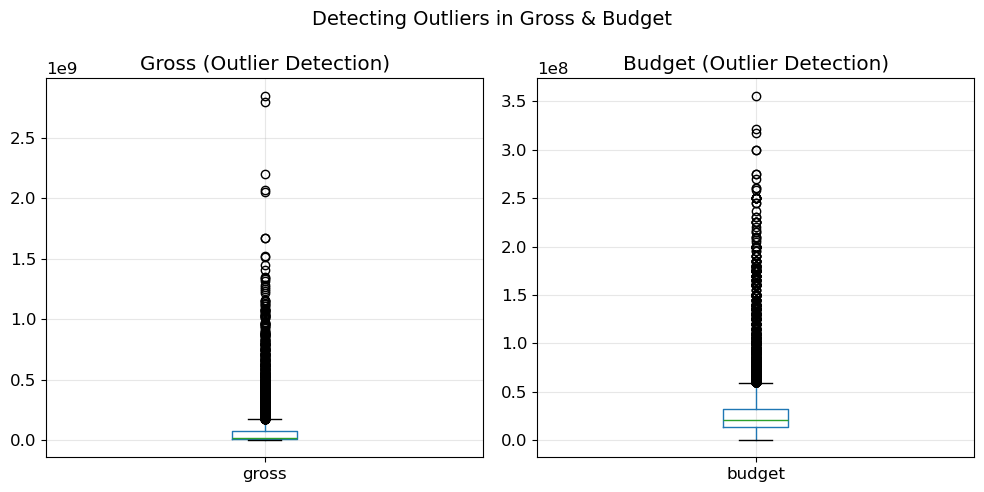

In [43]:
#  Detecting Outliers in 'gross' and 'budget'

# Create a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Boxplot for 'gross'
df.boxplot(column=['gross'], ax=axes[0])
axes[0].set_title('Gross (Outlier Detection)')

# Boxplot for 'budget'
df.boxplot(column=['budget'], ax=axes[1])
axes[1].set_title('Budget (Outlier Detection)')

# Adjust layout and show plots
plt.suptitle('Detecting Outliers in Gross & Budget', fontsize=14)
plt.tight_layout()
plt.show()


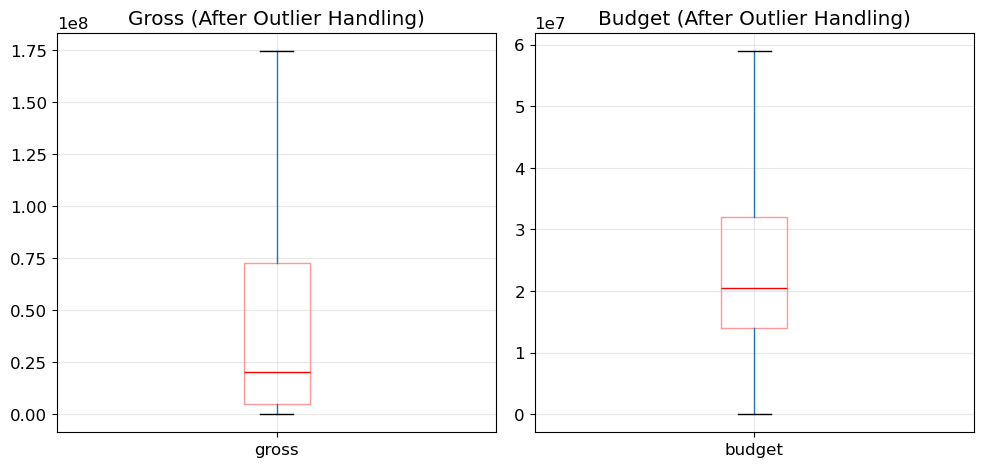

In [44]:
# Handling Outliers using IQR
import numpy as np
import matplotlib.pyplot as plt

# Handle outliers using IQR for 'gross' and 'budget'
for col in ['gross', 'budget']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers instead of removing
    df[col] = np.where(df[col] > upper_bound, upper_bound,
                       np.where(df[col] < lower_bound, lower_bound, df[col]))

# Visualize after outlier handling
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Boxplot for 'gross'
df.boxplot(column=['gross'], ax=axes[0],
           boxprops=dict(color='#FF9999'),   # light red box
           medianprops=dict(color='red'))    # darker red median line
axes[0].set_title('Gross (After Outlier Handling)')

# Boxplot for 'budget'
df.boxplot(column=['budget'], ax=axes[1],
           boxprops=dict(color='#FF9999'),
           medianprops=dict(color='red'))
axes[1].set_title('Budget (After Outlier Handling)')

plt.tight_layout()
plt.show()


In [45]:
# Sorting our data by gross in order to see some patterns
df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,4.699877e+07,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,5.885311e+07,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,1.745288e+08,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,8.345354e+07,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,3.984634e+07,Orion Pictures,98.0


<Figure size 1500x1000 with 0 Axes>

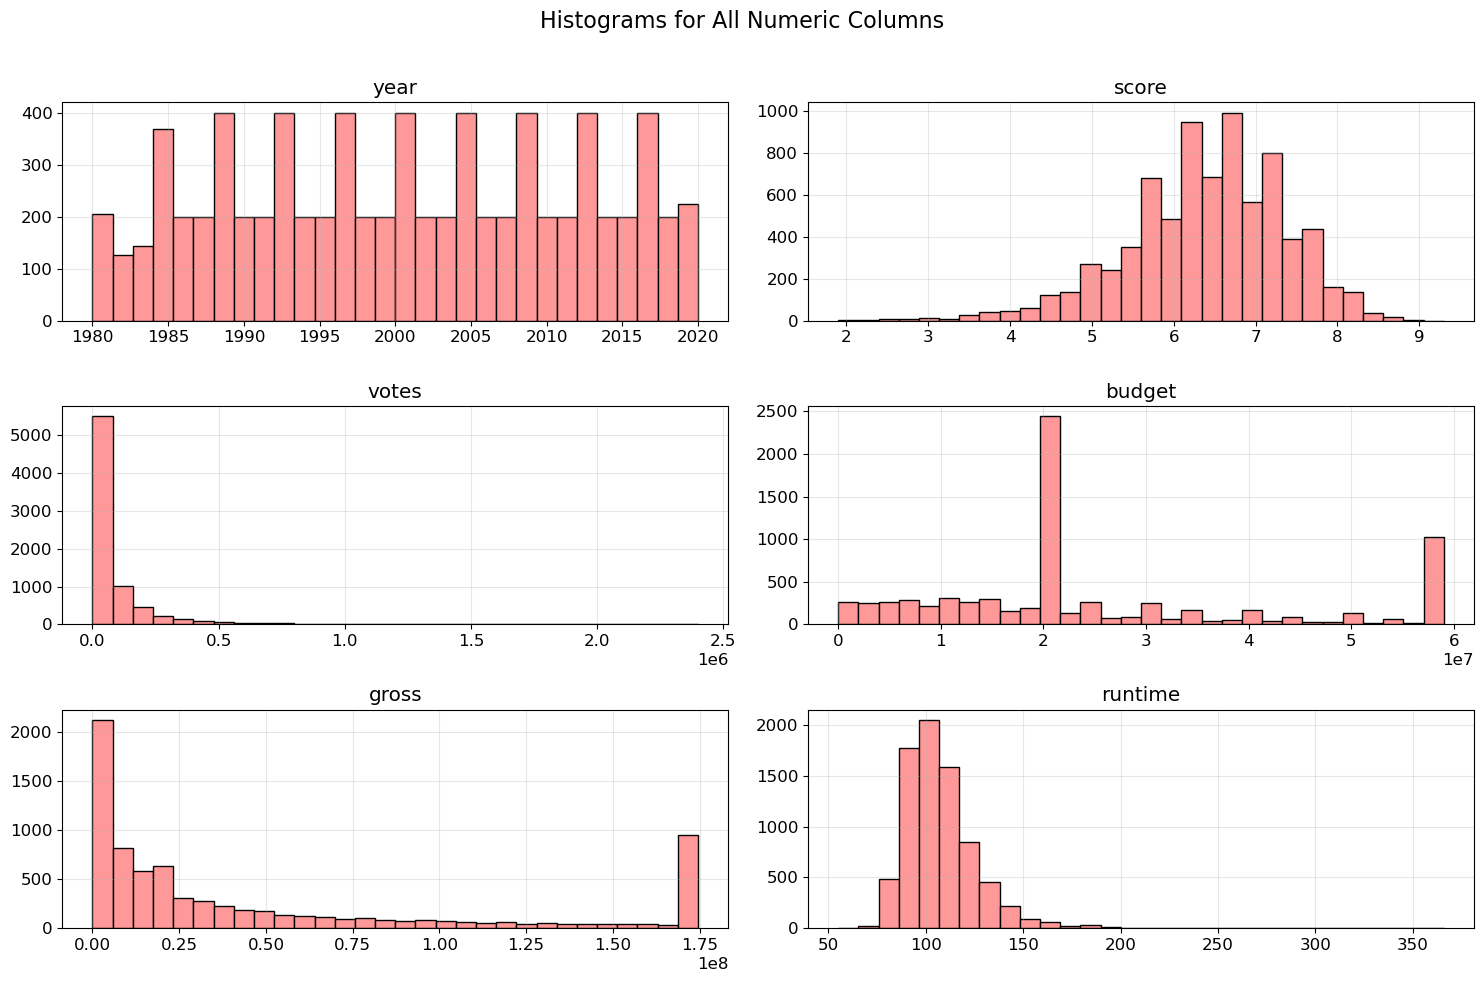

In [46]:
#Showing Skewness of data

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
df[numeric_cols].hist(
    bins=30,
    figsize=(15,10),
    color='#FF9999',
    edgecolor='black'
)

plt.suptitle('Histograms for All Numeric Columns', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


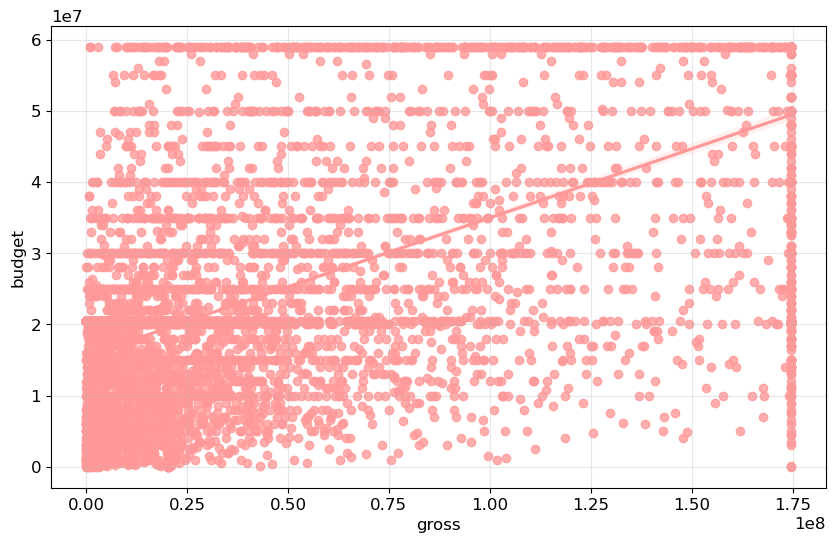

In [47]:
sns.regplot(x='gross',y='budget',data=df,color='#FF9999')
plt.show()

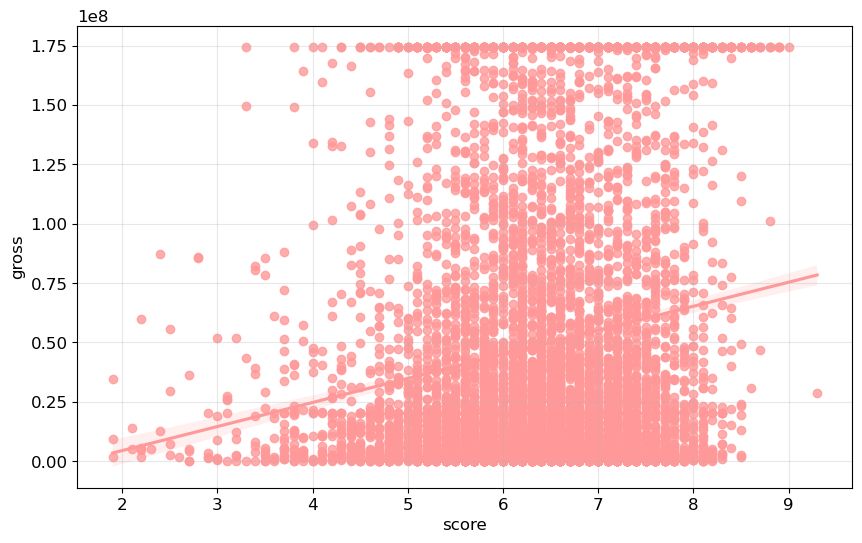

In [48]:
sns.regplot(x='score',y='gross',data=df,color='#FF9999')
plt.show()

In [49]:
# Correlation between numeric columns using the Pearson method
df.corr(method='pearson', numeric_only=True)


,year,score,votes,budget,gross,runtime
year,1.000000,0.098013,0.222573,0.288713,0.319455,0.120662
score,0.098013,1.000000,0.409157,0.014050,0.164900,0.399407
votes,0.222573,0.409157,1.000000,0.377753,0.582735,0.309151
budget,0.288713,0.014050,0.377753,1.000000,0.671224,0.268865
gross,0.319455,0.164900,0.582735,0.671224,1.000000,0.225992
runtime,0.120662,0.399407,0.309151,0.268865,0.225992,1.000000


In [50]:
# Corrleation using Kendall method
df.corr(method='kendall', numeric_only=True)


,year,score,votes,budget,gross,runtime
year,1.000000,0.067628,0.331208,0.183031,0.195465,0.097157
score,0.067628,1.000000,0.300087,-0.004457,0.082740,0.283447
votes,0.331208,0.300087,1.000000,0.265666,0.528972,0.198120
budget,0.183031,-0.004457,0.265666,1.000000,0.371368,0.191237
gross,0.195465,0.082740,0.528972,0.371368,1.000000,0.164205
runtime,0.097157,0.283447,0.198120,0.191237,0.164205,1.000000


In [51]:
#Corrlation using spearman method
df.corr(method='spearman', numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.099021,0.469557,0.254907,0.285675,0.142941
score,0.099021,1.000000,0.428088,-0.006625,0.120816,0.399632
votes,0.469557,0.428088,1.000000,0.378032,0.720874,0.289986
budget,0.254907,-0.006625,0.378032,1.000000,0.514823,0.267420
gross,0.285675,0.120816,0.720874,0.514823,1.000000,0.239049
runtime,0.142941,0.399632,0.289986,0.267420,0.239049,1.000000


### Extracting Insights

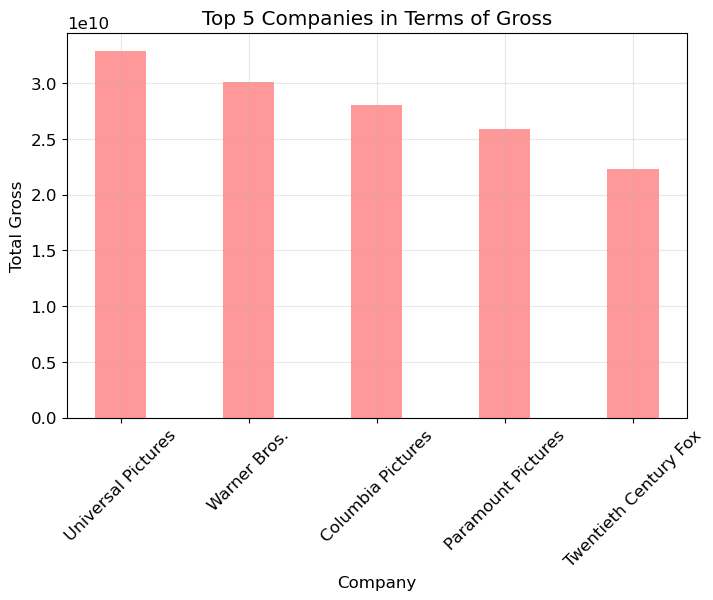

In [52]:

# Get the top 5 companies by gross
top5 = df.groupby('company')['gross'].sum().sort_values(ascending=False).head(5)

# Draw bar chart
plt.figure(figsize=(8,5))


plt.bar(top5.index, top5.values, color='#FF9999', width=0.4)

# Add labels and title
plt.xlabel('Company')
plt.ylabel('Total Gross')
plt.title('Top 5 Companies in Terms of Gross')

# Rotate x-labels for readability
plt.xticks(rotation=45)
plt.show()


In [53]:
#Showing the names of columns of our data
df.columns


Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

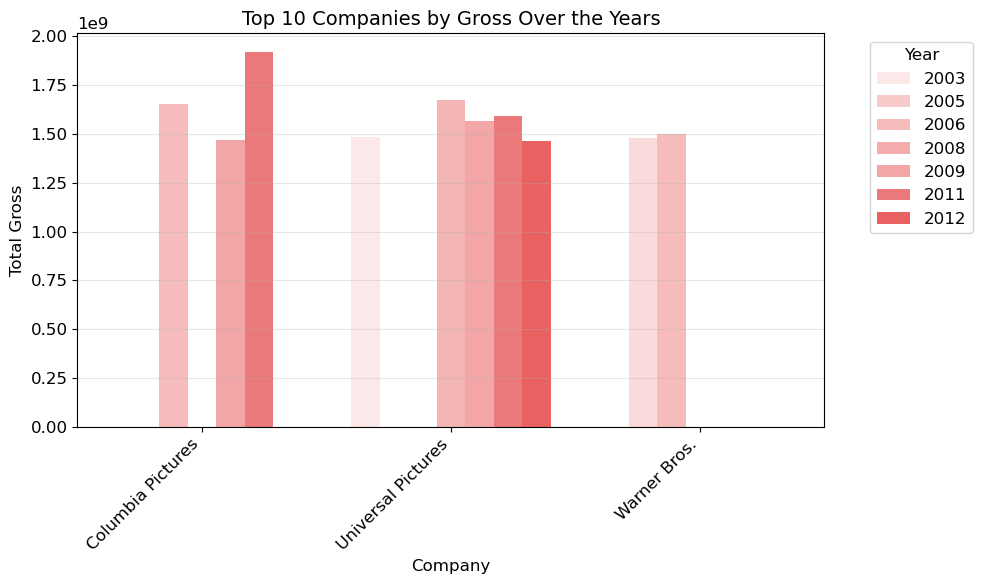

In [54]:
# Top 10 Companies by Gross Over the Years
from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list(
    "custom_ff9999",
    ["#FFE5E5", "#FFB3B3", "#FF9999", "#FF4C4C"]
)

CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross', 'company', 'year'], ascending=False)[:10]

CompanyGrossSumSorted['gross'] = CompanyGrossSumSorted['gross'].astype('int64')

CompanyGrossSumSorted = CompanyGrossSumSorted.reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=CompanyGrossSumSorted,
    x='company',
    y='gross',
    hue='year',
    palette=custom_cmap
)

plt.title('Top 10 Companies by Gross Over the Years', fontsize=14)
plt.xlabel('Company')
plt.ylabel('Total Gross')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



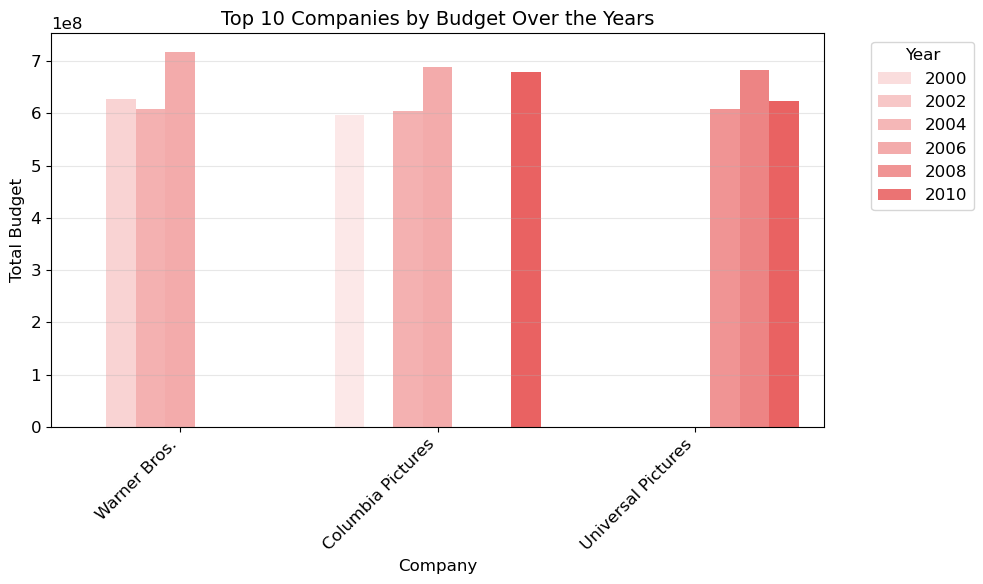

In [55]:
# Top 10 Companies by Budget Over the Years

from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list(
    "custom_ff9999",
    ["#FFE5E5", "#FFB3B3", "#FF9999", "#FF4C4C"]
)

CompanyBudgetSum = df.groupby(['company', 'year'])[["budget"]].sum()

CompanyBudgetSumSorted = CompanyBudgetSum.sort_values(['budget', 'company', 'year'], ascending=False)[:10]

CompanyBudgetSumSorted['budget'] = CompanyBudgetSumSorted['budget'].astype('int64')

CompanyBudgetSumSorted = CompanyBudgetSumSorted.reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=CompanyBudgetSumSorted,
    x='company',
    y='budget',
    hue='year',
    palette=custom_cmap
)

plt.title('Top 10 Companies by Budget Over the Years', fontsize=14)
plt.xlabel('Company')
plt.ylabel('Total Budget')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


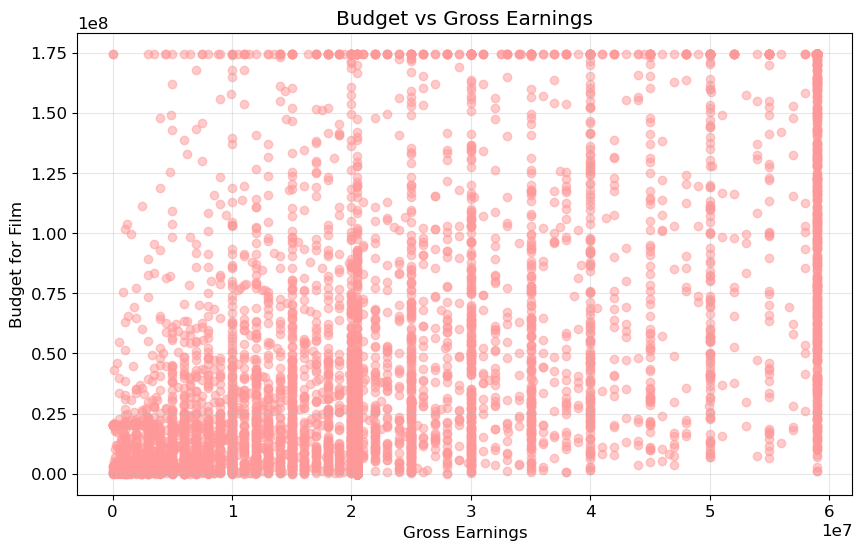

In [56]:
 # BUDGET VS GROSS SCATTER (Profitability)
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5,color='#FF9999')
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

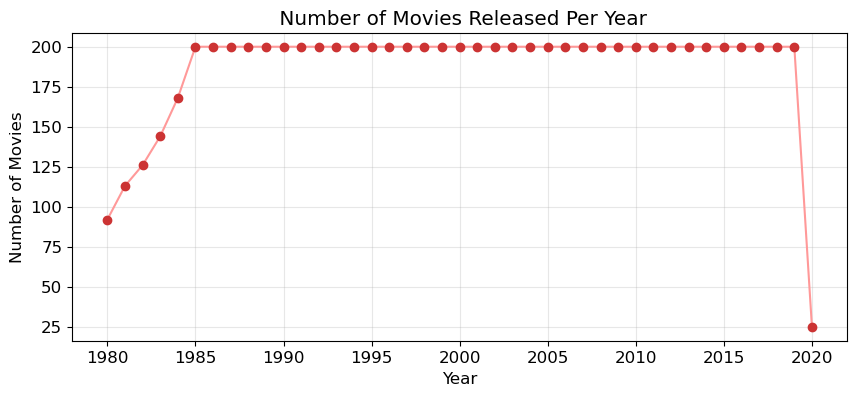

In [57]:
#  TOTAL MOVIES PER YEAR

plt.figure(figsize=(10,4))
df['year'].value_counts().sort_index().plot(kind='line', color='#FF9999', marker='o',         
    markerfacecolor='#CC3333', 
    markeredgecolor='#CC3333'  )
plt.title(' Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

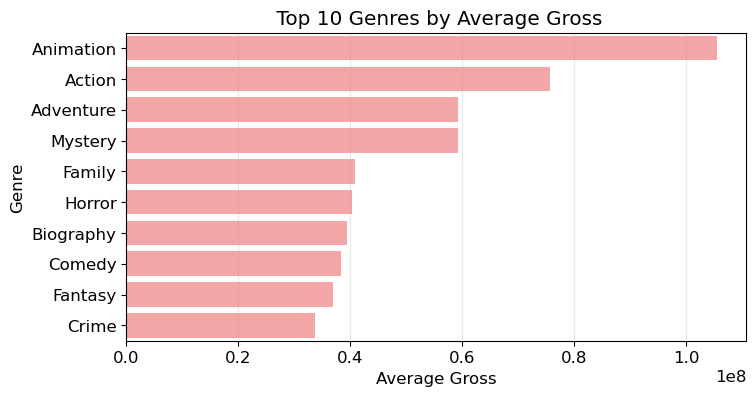

In [58]:
#  TOP 10 GENRES BY AVERAGE GROSS

plt.figure(figsize=(8,4))
genre_gross = df.groupby('genre')['gross'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=genre_gross.values, y=genre_gross.index, color='#FF9999')
plt.title(' Top 10 Genres by Average Gross')
plt.xlabel('Average Gross')
plt.ylabel('Genre')
plt.show()


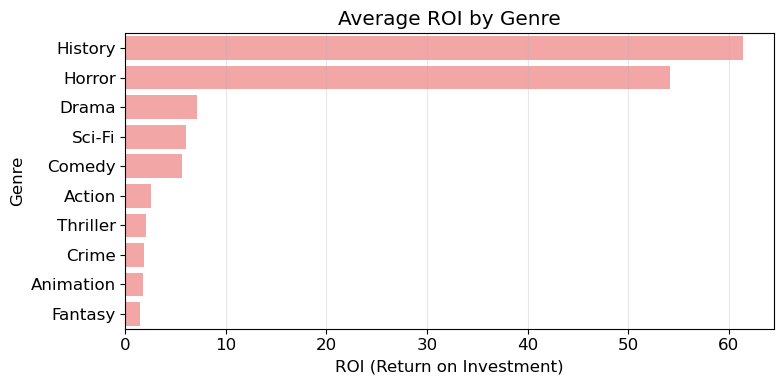

In [59]:
#  ROI (Return on Investment) BY GENRE
df['ROI'] = (df['gross'] - df['budget']) / df['budget']
roi_by_genre = df.groupby('genre')['ROI'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=roi_by_genre.values, y=roi_by_genre.index,color='#FF9999')
plt.title('Average ROI by Genre')
plt.xlabel('ROI (Return on Investment)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()



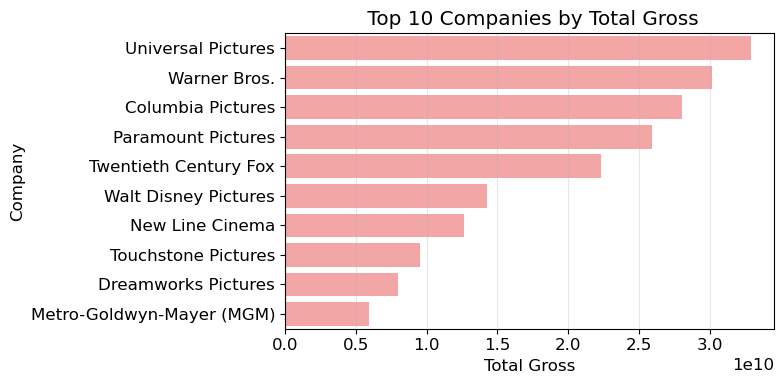

In [60]:

#  TOP 10 COMPANIES BY TOTAL GROSS

top_companies = df.groupby('company')['gross'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_companies.values, y=top_companies.index, color='#FF9999')
plt.title(' Top 10 Companies by Total Gross')
plt.xlabel('Total Gross')
plt.ylabel('Company')
plt.tight_layout()
plt.show()


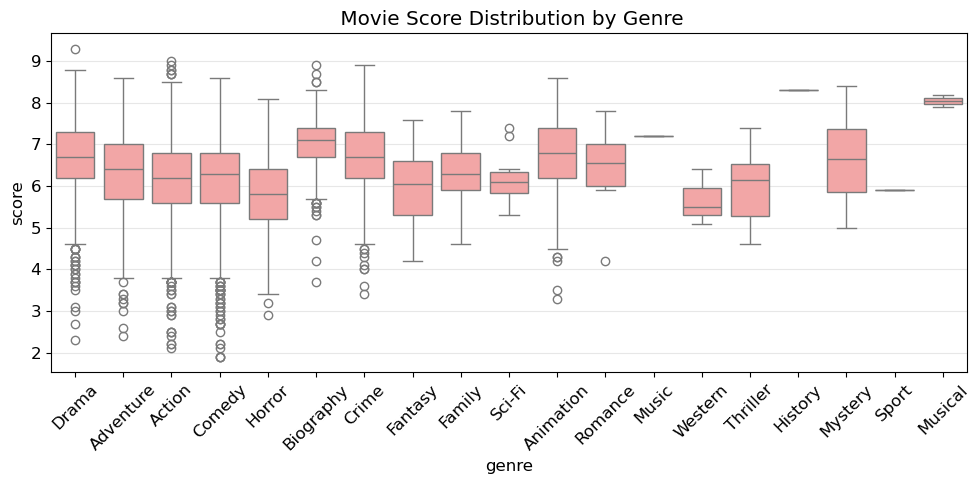

In [61]:
#  SCORE DISTRIBUTION BY GENRE
plt.figure(figsize=(10,5))
sns.boxplot(x='genre', y='score', data=df, color='#FF9999')
plt.title(' Movie Score Distribution by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

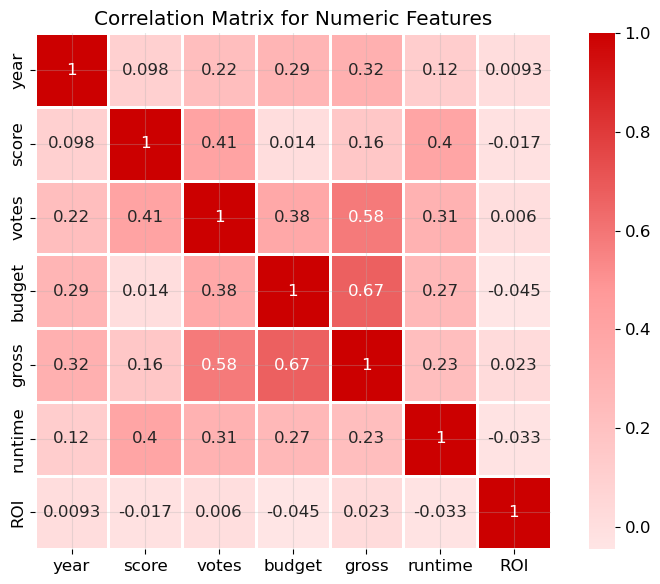

In [62]:
#  CORRELATION HEATMAP FOR NUMERIC FEATURES
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list("custom_ff9999", ["#FFE5E5", "#FF9999", "#CC0000"])

corr = df.corr(method='pearson', numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap=custom_cmap, linewidths=1, square=True)
plt.title("Correlation Matrix for Numeric Features")
plt.tight_layout()
plt.show()


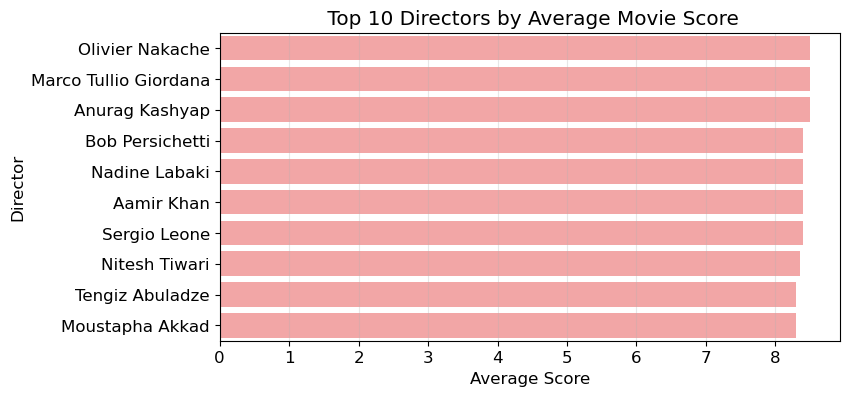

In [63]:
# TOP 10 DIRECTORS BY AVERAGE SCORE
top_directors = df.groupby('director')['score'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_directors.values, y=top_directors.index, color='#FF9999')
plt.title(' Top 10 Directors by Average Movie Score')
plt.xlabel('Average Score')
plt.ylabel('Director')
plt.show()

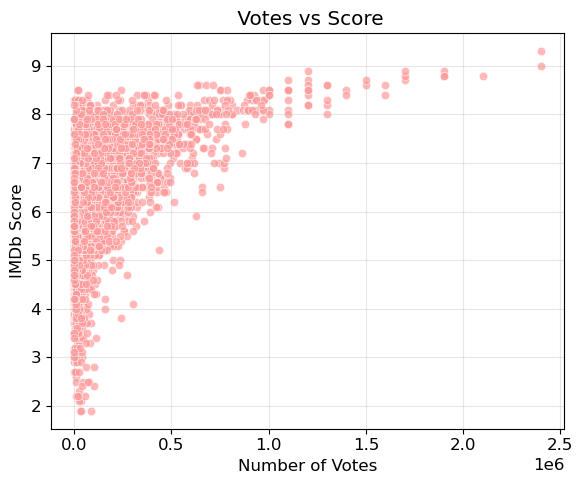

In [64]:

# RELATIONSHIP BETWEEN VOTES AND SCORE
plt.figure(figsize=(6,5))
sns.scatterplot(x='votes', y='score', data=df, color='#FF9999', alpha=0.7)
plt.title(' Votes vs Score')
plt.xlabel('Number of Votes')
plt.ylabel('IMDb Score')
plt.tight_layout()
plt.show()

In [65]:
# PRINT KEY STATISTICS

print(" KEY STATISTICS")
print("-"*50)
print("Average Movie Score:", round(df['score'].mean(), 2))
print("Average Budget: $", round(df['budget'].mean(), 2))
print("Average Gross: $", round(df['gross'].mean(), 2))
print("Highest Grossing Movie:", df.loc[df['gross'].idxmax(), 'name'])
print("Top Earning Genre:", df.groupby('genre')['gross'].mean().idxmax())

 KEY STATISTICS
--------------------------------------------------
Average Movie Score: 6.39
Average Budget: $ 25074890.02
Average Gross: $ 48935213.79
Highest Grossing Movie: Star Wars: Episode V - The Empire Strikes Back
Top Earning Genre: Animation


In [66]:
# The End Of The Project